# Predict heart disease rate by county in the US: Regression
## Data Wrangling and EDA Notebook



The goal is to predict the rate of heart disease (per 100,000 individuals) across the United States at the county-level from other socioeconomic indicators. Data was scraped from the USDA ERS website.

The target column is labeled `heart_disease_mortality_per_100k` which is in the 'Training_labels.csv' file.

For more reference, you can access the original kaggle dataset here: [Microsoft Data Science Capstone](https://www.kaggle.com/nandvard/microsoft-data-science-capstone).

---

### Import neccessary modules and review the initial data

In [2]:
# Import neccessary packages for data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# show all columns
pd.set_option('display.max_column', None)

# set style for seaborn plots
sns.set_style('whitegrid')

In [3]:
# establish helper functions

# function to print text in bold
def print_bold(_str):
    print("\033[1m" + _str + "\033[0m")

In [4]:
# Check out all the files used for this project
for file in os.listdir('../Data/predict heart disease rate'):
    print(file)

DataWrangling_output.csv
dfno_output.csv
df_output.csv
Test_values.csv
Training_labels.csv
Training_values.csv


### For this project, we will only be using the two 'Training_xxx' files.

We will not be using the 'Test_values.csv' file because it does not have any target values associated with it. This dataset was originally meant for a kaggle competition, where the 'Test_values.csv' file would generate a prediction file used for the competition.

In [5]:
# Load the training dataset
df = pd.read_csv('../Data/predict heart disease rate/Training_values.csv')
df.head(2)

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.23,0.131,0.089,NaN,0.332,13.0,2.8,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.19,0.090,0.082,0.181,0.265,10.0,2.3,19.79,2010.0,2480.0,a


In [6]:
# Print the shape of df and run the info() method on it
print(df.shape)
df.info()

(3198, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   row_id                                            3198 non-null   int64  
 1   area__rucc                                        3198 non-null   object 
 2   area__urban_influence                             3198 non-null   object 
 3   econ__economic_typology                           3198 non-null   object 
 4   econ__pct_civilian_labor                          3198 non-null   float64
 5   econ__pct_unemployment                            3198 non-null   float64
 6   econ__pct_uninsured_adults                        3196 non-null   float64
 7   econ__pct_uninsured_children                      3196 non-null   float64
 8   demo__pct_female                                  3196 non-null   float64
 9   demo__pc

In [7]:
df.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,3116.985616,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,0.769989,0.024680,0.013109,0.148815,0.350567,0.301143,0.199475,11.676986,10.301126,0.307668,0.213628,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286
std,1830.236781,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,0.207850,0.084563,0.025431,0.068208,0.070554,0.052318,0.089308,2.739516,2.786143,0.043228,0.062895,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467
min,0.000000,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,0.000000,0.000000,0.015075,0.065327,0.109548,0.011078,4.000000,0.000000,0.131000,0.046000,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000
25%,1504.250000,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,0.649000,0.002000,0.002000,0.096588,0.305357,0.264861,0.139234,10.000000,8.000000,0.284000,0.172000,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000
50%,3113.500000,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,0.007000,0.007000,0.133234,0.355015,0.301587,0.176471,11.000000,10.000000,0.309000,0.210000,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000
75%,4724.750000,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936250,0.014000,0.013000,0.194796,0.399554,0.336590,0.231354,13.000000,12.000000,0.334000,0.249000,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000
max,6276.000000,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,0.859000,0.341000,0.473526,0.558912,0.473953,0.798995,29.000000,27.000000,0.471000,0.513000,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000


---
#### Since our target column is not in this CSV file, we will add it to our dataframe using the `Training_labels.csv` file

In [8]:
target_vals = pd.read_csv('../Data/predict heart disease rate/Training_labels.csv')
target_vals.head()

,row_id,heart_disease_mortality_per_100k
0,0,312
1,1,257
2,4,195
3,5,218
4,6,355


In [9]:
# merge dataframes using the 'row_id' column to merge on 'row_id'
df = pd.merge(df, target_vals, on='row_id')
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


In [10]:
# Print the shape of df
df.shape

(3198, 35)

#### Now that we have linked the target variable with the features, we are going to drop the `row_id` column since it serves no purpose.

In [11]:
df = df.drop('row_id', axis=1)

### Quick, lets review the columns

#### Column descriptions
    
| Column | Description |
| --- | --- |
| **area__** | **information about the county** |
| area__rucc | Rural-Urban Continuum Codes "form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories. Each county in the U.S. is assigned one of the 9 codes." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/) |
| area_urbaninfluence | Urban Influence Codes "form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/urban-influence-codes/) |
| **econ__** | **economic indicators** |
| econ_economictypology | County Typology Codes "classify all U.S. counties according to six mutually exclusive categories of economic dependence and six overlapping categories of policy-relevant themes. The economic dependence types include farming, mining, manufacturing, Federal/State government, recreation, and nonspecialized counties. The policy-relevant types include low education, low employment, persistent poverty, persistent child poverty, population loss, and retirement destination." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/county-typology-codes.aspx) |
| econ_pctcivilian_labor | Civilian labor force, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econ_pctunemployment | Unemployment, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econpctuninsuredadults | Percent of adults without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/)|
| econpctuninsuredchildren | Percent of children without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| **health__** | **health indicators** |
| health_pctadult_obesity | Percent of adults who meet clinical definition of obese (National Center for Chronic Disease Prevention and Health Promotion) |
| health_pctadult_smoking | Percent of adults who smoke (Behavioral Risk Factor Surveillance System) |
| health_pctdiabetes | Percent of population with diabetes (National Center for Chronic Disease Prevention and Health Promotion, Division of Diabetes Translation) |
| health_pctlow_birthweight | Percent of babies born with low birth weight (National Center for Health Statistics) |
| health_pctexcessive_drinking | Percent of adult population that engages in excessive consumption of alcohol (Behavioral Risk Factor Surveillance System, ) |
| health_pctphysical_inacticity | Percent of adult population that is physically inactive (National Center for Chronic Disease Prevention and Health Promotion) |
| health_airpollutionparticulatematter | Fine particulate matter in µg/m³ (CDC WONDER, https://wonder.cdc.gov/wonder/help/pm.html) |
| health_homicidesper_100k | Deaths by homicide per 100,000 population (National Center for Health Statistics) |
| health_motorvehiclecrashdeathsper100k | Deaths by motor vehicle crash per 100,000 population (National Center for Health Statistics) |
| health_popper_dentist | Population per dentist (HRSA Area Resource File) |
| health_popperprimarycare_physician | Population per Primary Care Physician (HRSA Area Resource File) |
| **demo__** | **demographics information** |
| demo_pctfemale | Percent of population that is female (US Census Population Estimates) |
| demo_pctbelow18yearsofage | Percent of population that is below 18 years of age (US Census Population Estimates) |
| demo_pctaged65yearsandolder | Percent of population that is aged 65 years or older (US Census Population Estimates) |
| demo_pcthispanic | Percent of population that identifies as Hispanic (US Census Population Estimates) |
| demo_pctnonhispanicafrican_american | Percent of population that identifies as African American (US Census Population Estimates) |
| demo_pctnonhispanicwhite | Percent of population that identifies as Hispanic and White (US Census Population Estimates) |
| demo_pctamericanindianoralaskannative | Percent of population that identifies as Native American (US Census Population Estimates) |
| demo_pctasian | Percent of population that identifies as Asian (US Census Population Estimates) |
| demo_pctadultslessthanahighschooldiploma | Percent of adult population that does not have a high school diploma (US Census, American Community Survey) |
| demo_pctadultswithhighschooldiploma | Percent of adult population which has a high school diploma as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultswithsome_college | Percent of adult population which has some college as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultsbachelorsor_higher | Percent of adult population which has a bachelor's degree or higher as highest level of education achieved (US Census, American Community Survey) |
| demo_birthrateper1k | Births per 1,000 of population (US Census Population Estimates) |
| demo_deathrateper1k | Deaths per 1,000 of population (US Census Population Estimates) |
| yr | denoted by 'a' and 'b' - they represent two different years |

## Data Wrangling
**Lets take a look at the categorical features**

In [12]:
# Identify the categorical features and their unique values
for feat in df.columns:
    if df[feat].dtype == 'O':
        print(f'{feat.upper()} - {df[feat].nunique()}\n{df[feat].unique()}\n')

AREA__RUCC - 9
['Metro - Counties in metro areas of fewer than 250,000 population'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']

AREA__URBAN_INFLUENCE - 12
['Small-in a metro area with fewer than 1 million residents'
 'Large-in a metro area with at least 1 million residents or more'
 'Noncore adjacent to a small metro with town of at least 2,500 residents'
 'Noncore not adjacent to a metro/micro area and

**Features `area__rucc` and `area__urban_influence` are very specific. Lets try to break these features into simpler categories.**

Starting with the feature `area__rucc`, lets break it up into two categories 'Metro' and 'Nonmetro'. And we will do the same for `area__urban_influence` and parse out the first word of the description.

In [13]:
df.area__rucc = df.area__rucc.apply(lambda x: x.split()[0])
df.area__urban_influence = df.area__urban_influence.apply(lambda x: x.split()[0])

In [14]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


It looks like a majority of the feature plots are normally distributed, with the exception of a few plots with the prefix `demo__` indicating there might be a large amount of outliers.

#### Lets look at these categorical features in correlation to the target variable `heart_disease_mortality_per_100k`

In [15]:
# create a correlation table
corr_vals = df.corr()['heart_disease_mortality_per_100k'].sort_values()[:-1]

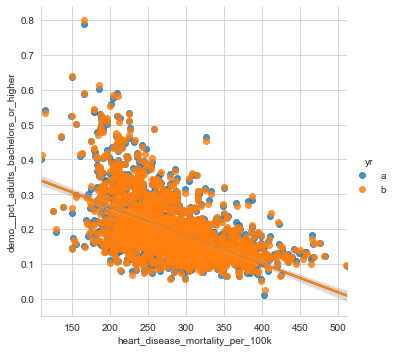

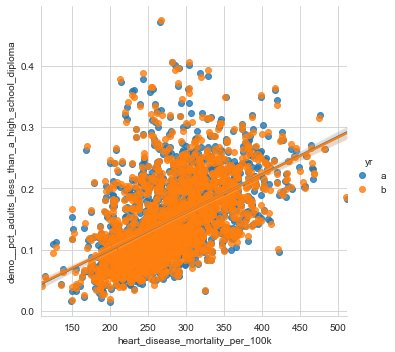

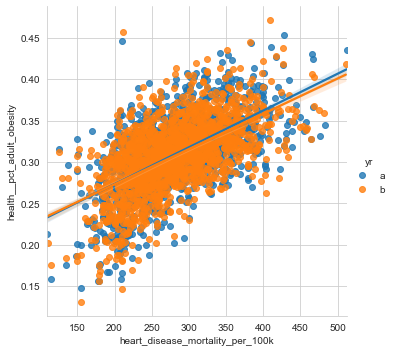

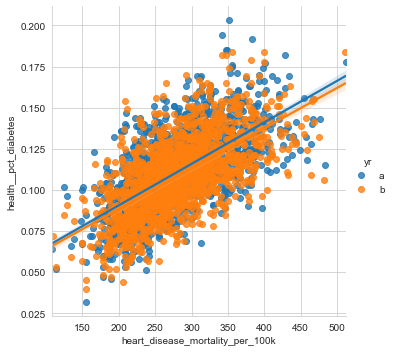

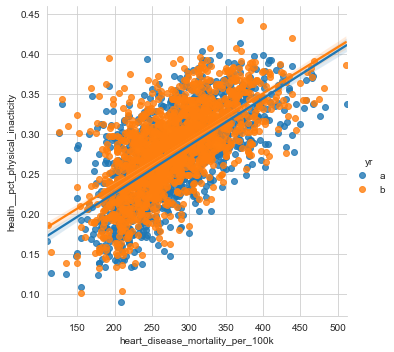

In [16]:
# plot out all features with a correlation value of magnitude 0.5 or greater
for row in corr_vals.index:
    if abs(corr_vals[row]) >= 0.5:
        x = 'heart_disease_mortality_per_100k'
        y = row

        _ = sns.lmplot(x, y, data=df, hue='yr')

Looking at the above plots, the feature `yr` does not make a noticable difference to the data. We will proceed to dropping this feature.

In [17]:
df = df.drop('yr', axis=1)

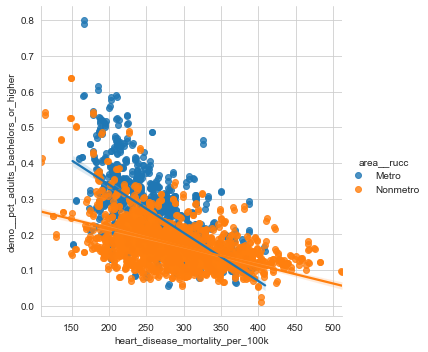

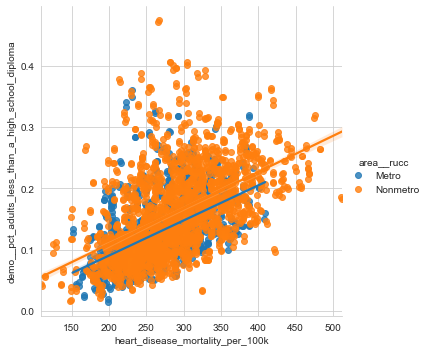

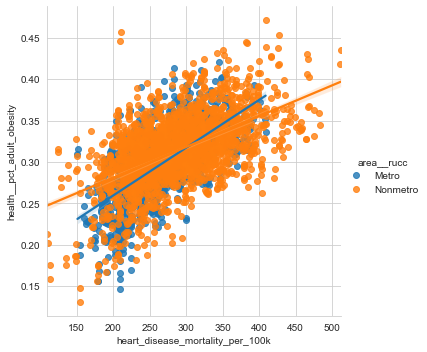

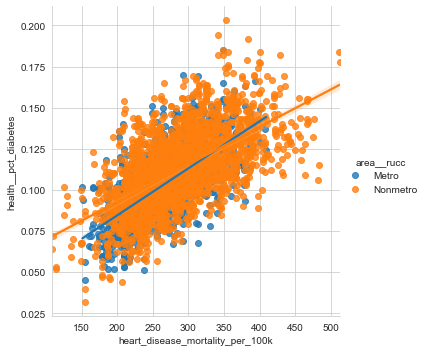

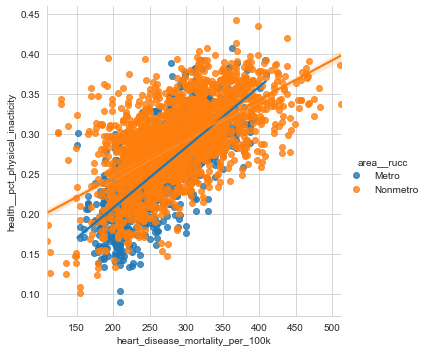

In [18]:
# plot out all features with a correlation value of magnitude 0.5 or greater
for row in corr_vals.index:
    if abs(corr_vals[row]) >= 0.5:
        x = 'heart_disease_mortality_per_100k'
        y = row

        _ = sns.lmplot(x, y, data=df, hue='area__rucc')

The feature `area__rucc` shows a difference in trends based on 'Metro' or 'Nonmetro', so we will hold on to this feature.

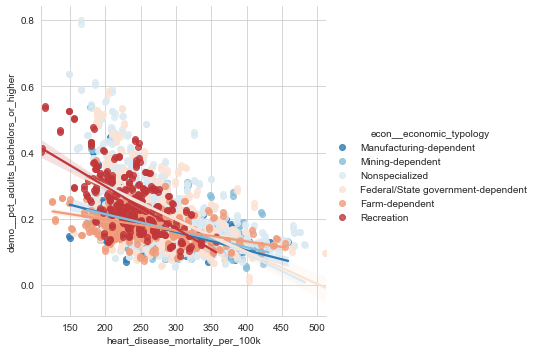

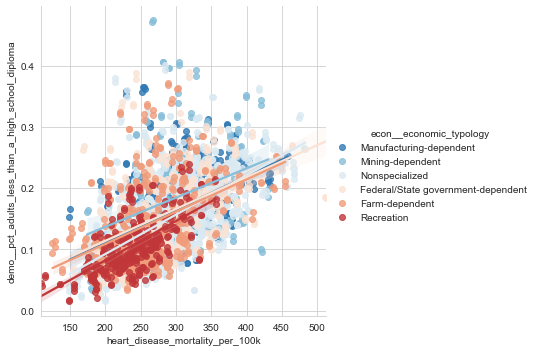

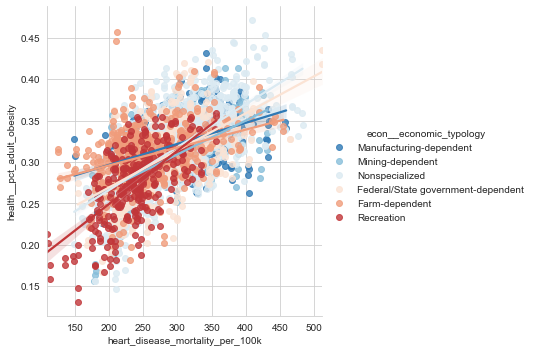

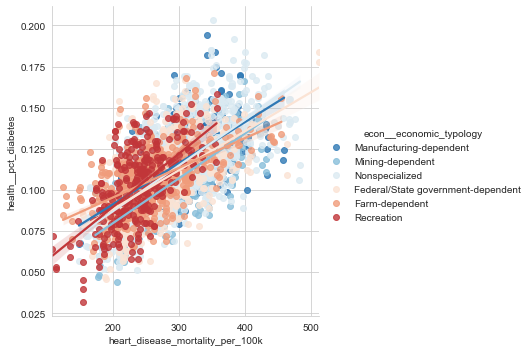

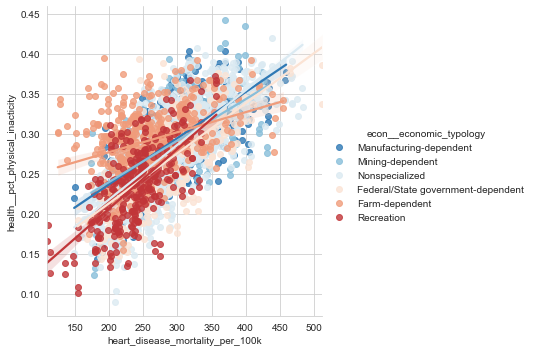

In [19]:
# plot out all features with a correlation value of magnitude 0.5 or greater
for row in corr_vals.index:
    if abs(corr_vals[row]) >= 0.5:
        x = 'heart_disease_mortality_per_100k'
        y = row
        hue = 'area__rucc'

        _ = sns.lmplot(x, y, data=df, hue='econ__economic_typology',palette="RdBu_r")

#### The above plots are too cluttered, so we will look at a different style plot. Let's try out a violin plot.

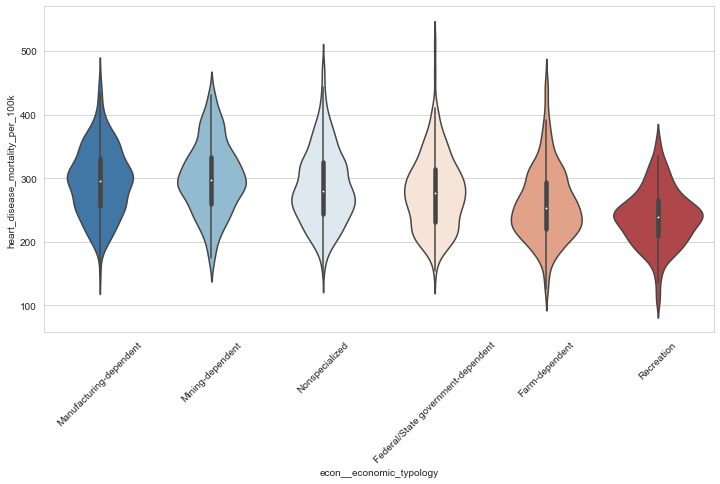

In [20]:
_ = plt.figure(figsize=(12,6))
sns.violinplot(x='econ__economic_typology', y='heart_disease_mortality_per_100k', data=df,palette="RdBu_r")
_ = plt.xticks(rotation=45)

**The above categorical values look to share similar distributions for the most part, except the the values "Recreation" and "Farm Dependent". In this case, we will still keep this feature.**

### Now we will perform some EDA on the numerical features.
Plot histograms for all features to check out the distributions

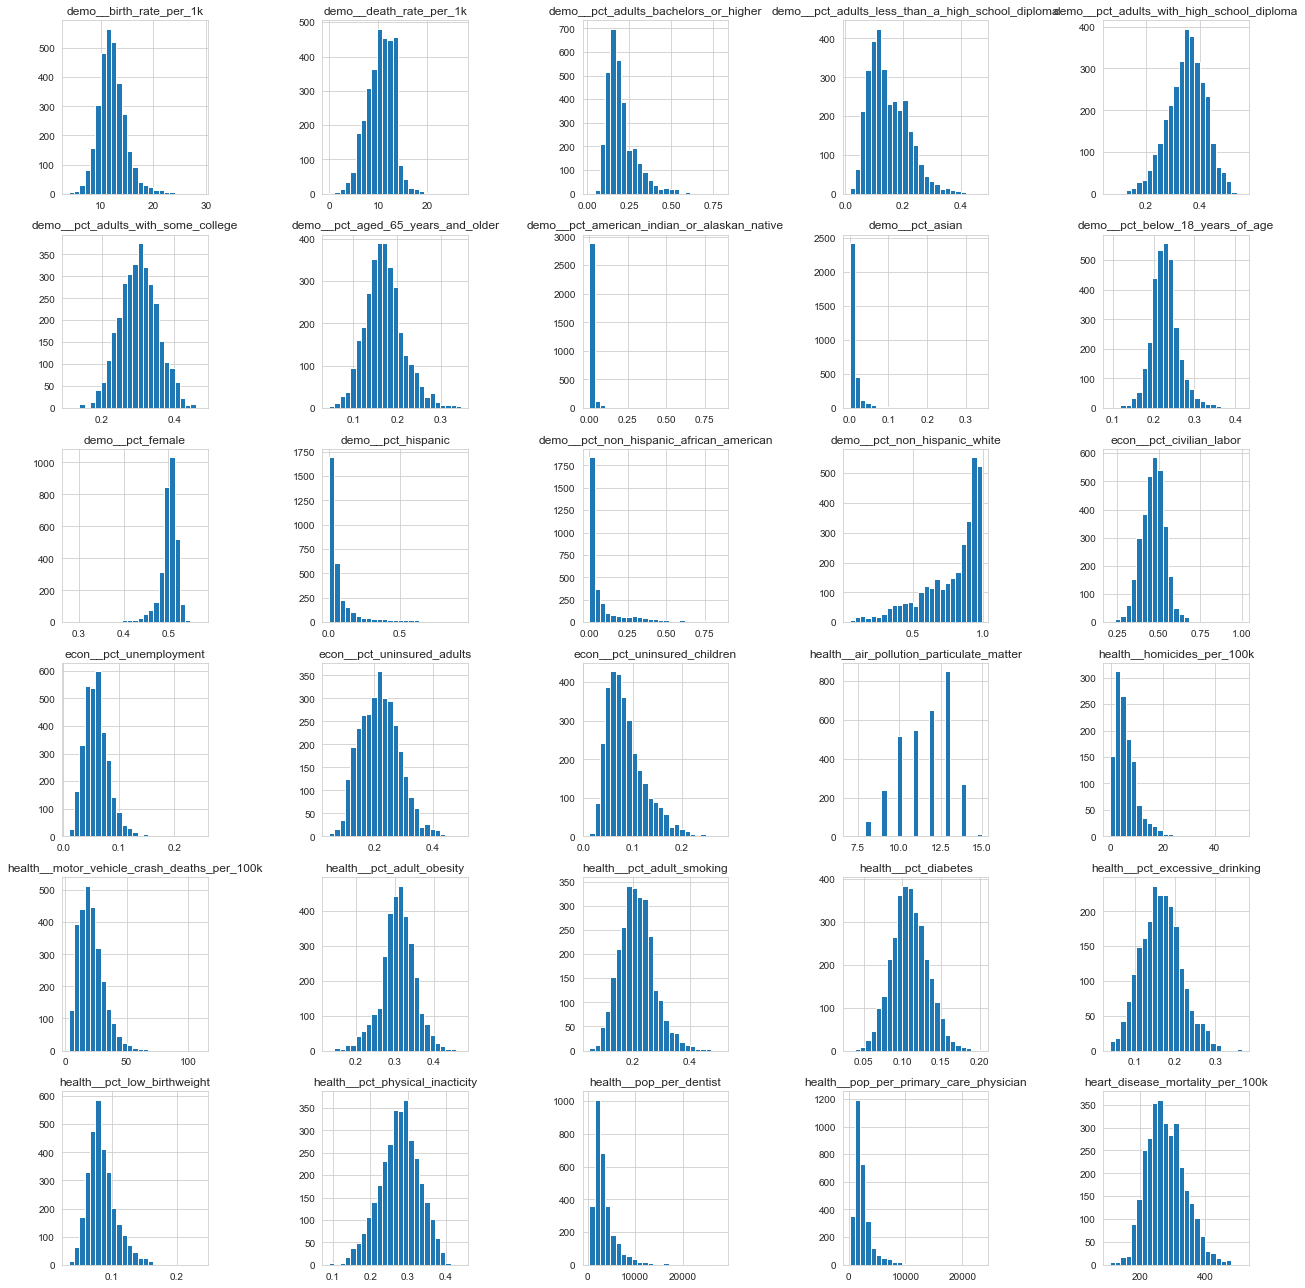

In [21]:
_ = df.hist(figsize=(18, 18), bins=25)
_ = plt.tight_layout()
plt.show()

It looks like most of the features have a normal distribution, but the `demo__` features seem to have a few that are skewed. This would indicate that there are some major outliers in these features. We will explore these.

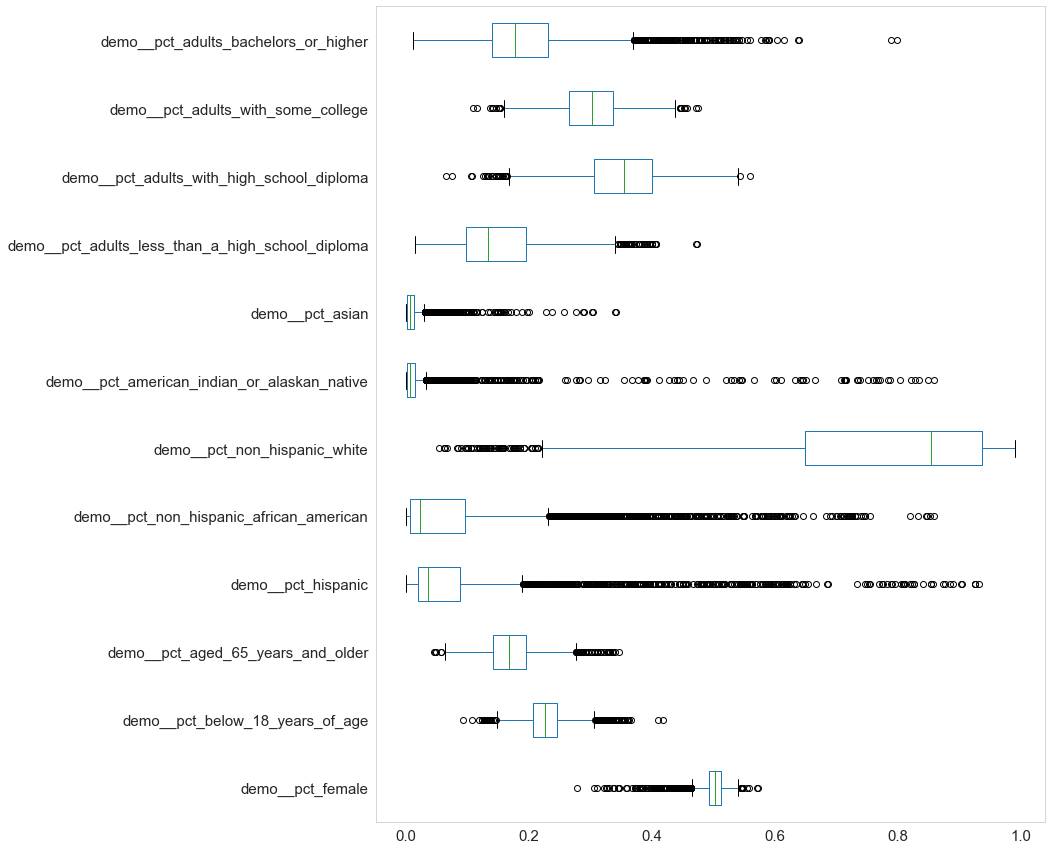

In [22]:
pct_list = list()

for col in df.columns:
    if 'demo__' in col and '_pct' in col:
        pct_list.append(col)
df[pct_list].boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
plt.show()

As we can see, the box plots above show there are many cases of extreme outliers. We will handle these outliers, and look at the result to make a decision if they should be removed from the data.

**We will do this once we are done cleaning the data...**

### Let's review the missing data in this data frame.

In [23]:
# group data for column names, datatype, and null values and percent for each column
dtypes = pd.DataFrame(df.dtypes.values, columns=['dtype'])
dcolumns = pd.DataFrame(df.columns, columns=['Column Name'])
dnull = pd.DataFrame(df.isnull().sum().values, columns=['NaN count'])
dnullpct = pd.DataFrame(data=(100 * (df.isnull().sum() / len(df))).values, columns=['Percent NaN'])

# print column names with associated datatype and percent of null values
df_defs = pd.concat([dcolumns, dtypes, dnull, dnullpct], axis=1)
df_defs

,Column Name,dtype,NaN count,Percent NaN
0,area__rucc,object,0,0.000000
1,area__urban_influence,object,0,0.000000
2,econ__economic_typology,object,0,0.000000
3,econ__pct_civilian_labor,float64,0,0.000000
4,econ__pct_unemployment,float64,0,0.000000
5,econ__pct_uninsured_adults,float64,2,0.062539
6,econ__pct_uninsured_children,float64,2,0.062539
7,demo__pct_female,float64,2,0.062539
8,demo__pct_below_18_years_of_age,float64,2,0.062539
9,demo__pct_aged_65_years_and_older,float64,2,0.062539


## Data Cleaning
    
Handling the missing values

In [24]:
# only review the columns with missing values...
df_defs[df_defs['Percent NaN'] > 0]

,Column Name,dtype,NaN count,Percent NaN
5,econ__pct_uninsured_adults,float64,2,0.062539
6,econ__pct_uninsured_children,float64,2,0.062539
7,demo__pct_female,float64,2,0.062539
8,demo__pct_below_18_years_of_age,float64,2,0.062539
9,demo__pct_aged_65_years_and_older,float64,2,0.062539
10,demo__pct_hispanic,float64,2,0.062539
11,demo__pct_non_hispanic_african_american,float64,2,0.062539
12,demo__pct_non_hispanic_white,float64,2,0.062539
13,demo__pct_american_indian_or_alaskan_native,float64,2,0.062539
14,demo__pct_asian,float64,2,0.062539


#### It seems that there are many columns that only have 2 values missing, we will ignore them for now. Let's start by looking at the column with the most missing data: `health__homicides_per_100k`

In [25]:
df['health__homicides_per_100k'].describe()

count    1231.000000
mean        5.947498
std         5.031822
min        -0.400000
25%         2.620000
50%         4.700000
75%         7.890000
max        50.490000
Name: health__homicides_per_100k, dtype: float64

This column contains more that 61% missing values, and does not indicate that NaN values would be 0 percent, therefore we will drop the column.

In [26]:
# drop the 'health__homicides_per_100k' column
df.drop('health__homicides_per_100k', axis=1, inplace=True)

Let's look at all the columns with less than 10% of missing values.
    
We will create a table that can be used to get the average value for each column based on 3 categorical columns

In [27]:
# Create a table that produces the mean values for each column based on:
# 'area__rucc', 'area__urban_influence', and 'econ_economic_typology'
mean_table = df.groupby(['area__rucc', 'area__urban_influence', 'econ__economic_typology']).mean()

In [28]:
mean_table

econ__pct_civilian_labor  \
area__rucc area__urban_influence econ__economic_typology                                        
Metro      Large-in              Farm-dependent                                      0.473500   
                                 Federal/State government-dependent                  0.475421   
                                 Manufacturing-dependent                             0.496978   
                                 Mining-dependent                                    0.480333   
                                 Nonspecialized                                      0.498267   
                                 Recreation                                          0.489024   
           Small-in              Farm-dependent                                      0.486818   
                                 Federal/State government-dependent                  0.464088   
                                 Manufacturing-dependent                             0.470802   
                                 Mining-dependent                                    0.452794   
                                 Nonspecialized                                      0.467003   
                                 Recreation                                          0.469069   
Nonmetro   Micropolitan          Farm-dependent                                      0.508781   
                                 Federal/State government-dependent                  0.422065   
                                 Manufacturing-dependent                             0.487743   
                                 Mining-dependent                                    0.464370   
                                 Nonspecialized                                      0.439880   
                                 Recreation                                          0.474661   
           Noncore               Farm-dependent                                      0.507618   
                                 Federal/State government-dependent                  0.406130   
                                 Manufacturing-dependent                             0.443542   
                                 Mining-dependent                                    0.483611   
                                 Nonspecialized                                      0.440249   
                                 Recreation                                          0.464687   

                                                                     econ__pct_unemployment  \
area__rucc area__urban_influence econ__economic_typology                                      
Metro      Large-in              Farm-dependent                                    0.065667   
                                 Federal/State government-dependent                0.059079   
                                 Manufacturing-dependent                           0.058435   
                                 Mining-dependent                                  0.046667   
                                 Nonspecialized                                    0.054425   
                                 Recreation                                        0.053429   
           Small-in              Farm-dependent                                    0.049477   
                                 Federal/State government-dependent                0.060842   
                                 Manufacturing-dependent                           0.059396   
                                 Mining-dependent                                  0.061559   
                                 Nonspecialized                                    0.059072   
                                 Recreation                                        0.059172   
Nonmetro   Micropolitan          Farm-dependent                                    0.046812   
                                 Federal/State government-dependent                0.069185   
                          

#### The table `mean_table` will be used to fill missing values for all features with less than 10% missing values

The table is created using the groupby() function, which will categorize all other features into a single aggregate value (in our case, the mean value). The function below will then pull the mean value from this table for the specific feature index that it has a missing value for.

In [29]:
# Create a function to be used in the .apply() method to retrieve mean values for missing data
def fillna_vals(val, table, columns=[], id_col=None):
    
    '''
    This function will fill NaN values with the given inputs:
    val - Target column for filling NaN values
    table - Table that will be used for indexing from and retrieving a value
    columns - Default is an empty list. Create a list of which columns are used to index from the given table argument.
    id_col - Default is None. Used to identify a column from a table that has multiple target columns with values.
    '''
    
    if id_col == None:
        if pd.isnull(val):
            # check to see if there is a null/None value in the list; we will ignore these and return a NaN value
            if None in columns:
                return np.nan
            else:
                return float(table.xs(columns))
        else:
            return val
    else:
        if pd.isnull(val):
            if None in columns:
                return pd.isnull()
            else:
                return float(table.xs(columns)[id_col])
        else:
            return val

In [30]:
# Create a df with columns that are less than 10% missing values (ignoring columns with only 2 missing values!)
df_10pct = df_defs[(df_defs['Percent NaN'] > 0) & (df_defs['Percent NaN'] <= 10) & (df_defs['NaN count'] != 2)]
df_10pct

,Column Name,dtype,NaN count,Percent NaN
24,health__pct_low_birthweight,float64,182,5.691057
27,health__air_pollution_particulate_matter,float64,28,0.875547
30,health__pop_per_dentist,float64,244,7.629769
31,health__pop_per_primary_care_physician,float64,230,7.191995


In [31]:
for col in df_10pct['Column Name']:
    df[col] = df.apply(lambda x: fillna_vals(x[col], mean_table, columns=[x['area__rucc'], x['area__urban_influence'],
                                                                          x['econ__economic_typology']], id_col=col), axis=1)

The above function is applying the function created above to each of the feature columns that has less than 10% missing values.

In [32]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,15.09,1650.0,1489.0,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,19.79,2010.0,2480.0,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,3.14,629.0,690.0,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,1810.0,6630.0,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,29.39,3489.0,2590.0,355


In [33]:
# Check the null count for all the columns in df
df.isnull().sum()

area__rucc                                            0
area__urban_influence                                 0
econ__economic_typology                               0
econ__pct_civilian_labor                              0
econ__pct_unemployment                                0
econ__pct_uninsured_adults                            2
econ__pct_uninsured_children                          2
demo__pct_female                                      2
demo__pct_below_18_years_of_age                       2
demo__pct_aged_65_years_and_older                     2
demo__pct_hispanic                                    2
demo__pct_non_hispanic_african_american               2
demo__pct_non_hispanic_white                          2
demo__pct_american_indian_or_alaskan_native           2
demo__pct_asian                                       2
demo__pct_adults_less_than_a_high_school_diploma      0
demo__pct_adults_with_high_school_diploma             0
demo__pct_adults_with_some_college              

Now lets look at the remaining columns with more than 10% missing values

In [34]:
df_GT10pct = df_defs[(df_defs['Percent NaN'] > 10) & (df_defs['Percent NaN'] < 60)]
df_GT10pct

,Column Name,dtype,NaN count,Percent NaN
22,health__pct_adult_smoking,float64,464,14.509068
25,health__pct_excessive_drinking,float64,978,30.581614
29,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


Let's review the 'health__pct_excessive_drinking' column since it has the most missing values.

In [93]:
# review the range of the feature using the describe method
df['health__pct_excessive_drinking'].describe()

count    3163.000000
mean        0.159919
std         0.045327
min         0.038000
25%         0.130000
50%         0.157000
75%         0.187964
max         0.367000
Name: health__pct_excessive_drinking, dtype: float64

#### Next, we will find which features are highly correlated to the feature `health__pct_excessive_drinking`.
We will use these highly correlated features to create a mean value to fill our missing values.

In [36]:
# determine which columns are most correlated to this column
print(df.corr()['health__pct_excessive_drinking'].sort_values()[:-1])

demo__pct_adults_less_than_a_high_school_diploma   -0.412436
health__pct_diabetes                               -0.384207
heart_disease_mortality_per_100k                   -0.382172
health__pct_low_birthweight                        -0.375514
econ__pct_uninsured_adults                         -0.340959
health__pct_physical_inacticity                    -0.337469
demo__pct_non_hispanic_african_american            -0.284243
health__pct_adult_obesity                          -0.235439
demo__pct_female                                   -0.215347
econ__pct_unemployment                             -0.214149
health__air_pollution_particulate_matter           -0.194161
health__motor_vehicle_crash_deaths_per_100k        -0.175239
demo__death_rate_per_1k                            -0.149701
demo__pct_below_18_years_of_age                    -0.125961
health__pop_per_dentist                            -0.117386
demo__birth_rate_per_1k                            -0.108256
health__pct_adult_smokin

Looking at the correlating columns, it looks like `econ__pct_civilian_labor` is most positively correlated, and `demo__pct_adults_less_than_a_high_school_diploma` is most negatively correlated.
    
These features will now be used to create mean value.

In order to create a table which will produce a mean value, we need to put the numerical features into categories. To do this, we will find the range of the values, the mean, and the standard deviation to create the most fit categories. For this, use the `describe()` method.



In [37]:
# Review the .describe() method for the two correlated columns to determine how to chunk the data into categorical columns
# example: 0-5%, 5-10%, etc...
df[['econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']].describe()

,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma
count,3198.000000,3198.000000
mean,0.467191,0.148815
std,0.074400,0.068208
min,0.207000,0.015075
25%,0.420000,0.096588
50%,0.468000,0.133234
75%,0.514000,0.194796
max,1.000000,0.473526


Based on the information in the previous table, the features will be 'chunked' into several categories.
    
e.g. for feature `econ__pct_civilian_labor`, the min value is 0.207 (or 20.7%), the max value is 1.000, the mean is 0.467, and the std is 0.074. Since roughly 68% of our values lie within the first standard deviation, we will want to make sure that the bulk of our categories are around the first std. Therefore, we will use reason to chunk the categories as follows: `20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80, 80-100`. As we get closer to the mean, the chunk size gets smaller because there will be more points that fall within these categories. Ensuring we include the min and max, we start at 20%, and end with 100%. The chunk categories are broken into an integer percentage (since the feature is a percentage).

#### We will do this same procedure for all features that had more than 10% missing values.
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| econ__pct_civilian_labor | 0.207-1.000, 0.467, 0.074 | 20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80, 80-100 |
| demo__pct_adults_less_than_a_high_school_diploma | 0.015-0.474, 0.149, 0.068 | 0-5, 5-10, 10-15, 15-20, 20-30, 30-40, 40-50 |

In [38]:
# Create the functions that will generate the new columns based on chunk size in the previous table
def chunk_econ_pcl(val):
    if val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.45:
        return '40-45'
    elif val > 0.45 and val <= 0.50:
        return '45-50'
    elif val > 0.50 and val <= 0.55:
        return '50-55'
    elif val > 0.55 and val <= 0.60:
        return '55-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'
    elif val > 0.80 and val <= 1.00:
        return '80-100'
    
def chunk_demo_hs_diplo(val):
    if val > 0.00 and val <= 0.05:
        return '0-5'
    elif val > 0.05 and val <= 0.10:
        return '5-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.50:
        return '40-50'

#### Below, we will create a dataframe that will be used to pull the mean values from to fill our missing values.

In [39]:
# create the dataframe that will be used for filtering the data
df_drink = df[['health__pct_excessive_drinking','econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']]

# use the .apply() method to create new columns based on the previously created functions
df_drink['econ__pct_civlab_cat'] = df_drink['econ__pct_civilian_labor'].apply(chunk_econ_pcl)
df_drink['demo__pct_less_hs_diplo_cat'] = df_drink['demo__pct_adults_less_than_a_high_school_diploma'].apply(chunk_demo_hs_diplo)
df_drink.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_excessive_drinking                      978
econ__pct_civilian_labor                              0
demo__pct_adults_less_than_a_high_school_diploma      0
econ__pct_civlab_cat                                  0
demo__pct_less_hs_diplo_cat                           0
dtype: int64

In [40]:
# view the head of the new df df_drink
df_drink.head()

,health__pct_excessive_drinking,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma,econ__pct_civlab_cat,demo__pct_less_hs_diplo_cat
0,NaN,0.408,0.194223,40-45,15-20
1,0.181,0.556,0.164134,55-60,15-20
2,0.195,0.541,0.158573,50-55,15-20
3,NaN,0.500,0.181637,45-50,15-20
4,0.194,0.471,0.122367,45-50,10-15


In [41]:
# Lets create the new table that will be used to filter the mean values by the correlated features
df_drink_table = df_drink.drop(['econ__pct_civilian_labor','demo__pct_adults_less_than_a_high_school_diploma'],
                               axis=1).groupby(['econ__pct_civlab_cat','demo__pct_less_hs_diplo_cat']).mean()

In [43]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_excessive_drinking'] = df_drink.apply(lambda x: fillna_vals(x['health__pct_excessive_drinking'], df_drink_table,
                                                                      columns=[x['econ__pct_civlab_cat'], x['demo__pct_less_hs_diplo_cat']]),
                                                axis=1)

### Do the same as above for the remaining two columns with more than 10% missing values

In [44]:
# drop 'health__pct_excessive_drinking' (index 25) to view the remaining columns
df_GT10pct.drop(25)

,Column Name,dtype,NaN count,Percent NaN
22,health__pct_adult_smoking,float64,464,14.509068
29,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


In [45]:
# determine which columns are most correlated to this column
df.corr()['health__pct_adult_smoking'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.522427
econ__pct_civilian_labor                           -0.432774
demo__pct_asian                                    -0.300080
demo__pct_adults_with_some_college                 -0.220110
demo__pct_hispanic                                 -0.203549
health__pct_excessive_drinking                     -0.143918
demo__pct_female                                   -0.061542
demo__pct_below_18_years_of_age                    -0.001050
econ__pct_uninsured_children                        0.005351
demo__pct_non_hispanic_african_american             0.025176
demo__pct_aged_65_years_and_older                   0.038207
demo__birth_rate_per_1k                             0.038505
demo__pct_non_hispanic_white                        0.039222
health__air_pollution_particulate_matter            0.195983
demo__pct_american_indian_or_alaskan_native         0.206414
health__pop_per_primary_care_physician              0.237388
health__pct_low_birthwei

The highest correlated features are `health__pct_physical_inacticity` and `demo__pct_adults_bachelors_or_higher `

In [46]:
df[['health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']].describe()

,health__pct_physical_inacticity,demo__pct_adults_bachelors_or_higher
count,3196.000000,3198.000000
mean,0.277161,0.199475
std,0.053003,0.089308
min,0.090000,0.011078
25%,0.242750,0.139234
50%,0.280000,0.176471
75%,0.313000,0.231354
max,0.442000,0.798995


Based on the information above, the columns above will be used to create 2 new categorical columns split up by the following:
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| health__pct_physical_inacticity | 0.090-0.442, 0.277, 0.053 | 0-10, 10-20, 20-25, 30-35, 35-45|
| demo__pct_adults_bachelors_or_higher | 0.011-0.799, 0.199, 0.089 | 0-10, 10-15, 15-20, 20-25, 25-30, 30-40, 40-60, 60-80 |

In [47]:
# Create the functions that will generate the new columns based on chunk size
def chunk_physinact(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.20:
        return '10-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.35:
        return '30-35'
    elif val > 0.35 and val <= 0.45:
        return '35-45'
    
def chunk_bachorhigher(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.60:
        return '40-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'

In [48]:
# create the dataframe that will be used for filtering the data
df_smoke = df[['health__pct_adult_smoking','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_smoke['health__phys_inact_cat'] = df_smoke['health__pct_physical_inacticity'].apply(chunk_physinact)
df_smoke['demo__bach_higher_cat'] = df_smoke['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_smoke.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_adult_smoking               464
health__pct_physical_inacticity           2
demo__pct_adults_bachelors_or_higher      0
health__phys_inact_cat                    2
demo__bach_higher_cat                     0
dtype: int64

In [49]:
df_smoke_table = df_smoke.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [50]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_adult_smoking'] = df_smoke.apply(lambda x: fillna_vals(x['health__pct_adult_smoking'], df_smoke_table,
                                                                      columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                axis=1)

#### Lastly we will work with the `health__motor_vehicle_crash_deaths_per_100k` column

In [51]:
# determine which columns are most correlated to this column
df.corr()['health__motor_vehicle_crash_deaths_per_100k'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.536784
demo__pct_asian                                    -0.371687
econ__pct_civilian_labor                           -0.346759
health__pct_excessive_drinking                     -0.213703
demo__pct_non_hispanic_white                       -0.114775
demo__pct_adults_with_some_college                 -0.095026
demo__pct_female                                   -0.078898
health__air_pollution_particulate_matter           -0.063069
demo__pct_hispanic                                 -0.053457
demo__pct_non_hispanic_african_american             0.106834
demo__birth_rate_per_1k                             0.122453
demo__pct_below_18_years_of_age                     0.136475
demo__pct_aged_65_years_and_older                   0.214857
econ__pct_unemployment                              0.229797
health__pct_low_birthweight                         0.258556
health__pop_per_primary_care_physician              0.282962
health__pop_per_dentist 

The most correlated features are the same as the previous column that we worked with. We will use the previous functions `chunk_physinact() and chunk_bachorhigher()` that were created to make the new table.

In [52]:
# create the dataframe that will be used for filtering the data
df_motor = df[['health__motor_vehicle_crash_deaths_per_100k','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_motor['health__phys_inact_cat'] = df_motor['health__pct_physical_inacticity'].apply(chunk_physinact)
df_motor['demo__bach_higher_cat'] = df_motor['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_motor.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__motor_vehicle_crash_deaths_per_100k    417
health__pct_physical_inacticity                  2
demo__pct_adults_bachelors_or_higher             0
health__phys_inact_cat                           2
demo__bach_higher_cat                            0
dtype: int64

In [53]:
df_motor_table = df_motor.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [54]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__motor_vehicle_crash_deaths_per_100k'] = df_motor.apply(lambda x: fillna_vals(x['health__motor_vehicle_crash_deaths_per_100k'], df_motor_table,
                                                                                         columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                                   axis=1)

### Now we will check the dataframe for the remaining null values.

In [55]:
df.isnull().sum()

area__rucc                                           0
area__urban_influence                                0
econ__economic_typology                              0
econ__pct_civilian_labor                             0
econ__pct_unemployment                               0
econ__pct_uninsured_adults                           2
econ__pct_uninsured_children                         2
demo__pct_female                                     2
demo__pct_below_18_years_of_age                      2
demo__pct_aged_65_years_and_older                    2
demo__pct_hispanic                                   2
demo__pct_non_hispanic_african_american              2
demo__pct_non_hispanic_white                         2
demo__pct_american_indian_or_alaskan_native          2
demo__pct_asian                                      2
demo__pct_adults_less_than_a_high_school_diploma     0
demo__pct_adults_with_high_school_diploma            0
demo__pct_adults_with_some_college                   0
demo__pct_

We can now use the .dropna() method on the remaining null values.

In [56]:
df = df.dropna()
print(df.shape)
df.head()

(3163, 32)


,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,355


Comparing the new shape to the original shape of the dataframe, we went from (3198) rows to (3163).

### Handling Outliers

Lets take a look at what our dataframe would look like if we removed all of the outliers using the **Interquartile Range** method.

**We will filter out these values and put them in a new data frame called `dfno`**

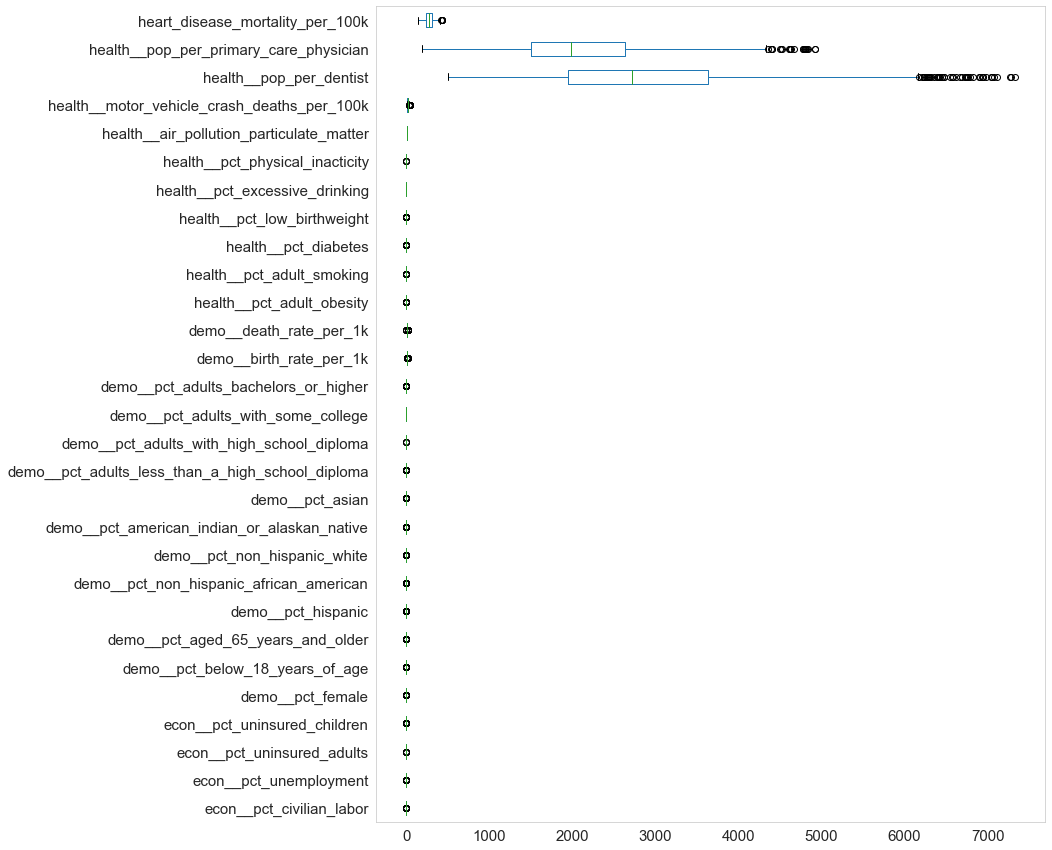

In [57]:
# Let's get the Interquartile range, or IQR.
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1

# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
dfno = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# We now want to make a boxplot of this new dataframe dfno. 
dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
plt.show()

Lets review the shape of the new data frame...

In [58]:
print('dfno shape: ', dfno.shape)
print('df shape: ', df.shape)

dfno shape:  (1369, 32)
df shape:  (3163, 32)


Looking at this, more than half of the data frame was removed... we are going to have to handle the outliers differently.

We will apply a function that will work to only remove the top 10% of all outliers in the dataframe. To do this, we will adjust the '1.5' constant in the IQR method.

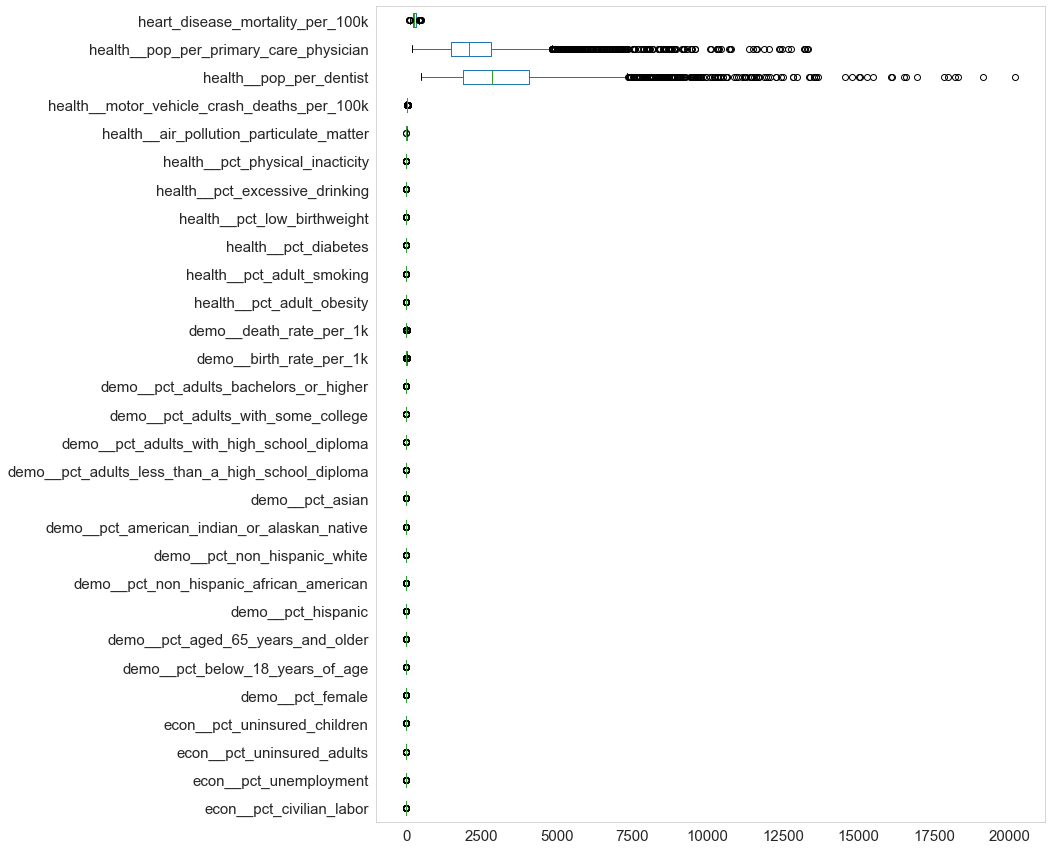

dfno shape:  (2885, 32)
df shape:  (3163, 32)


In [59]:
# create a variable 'dif' to be used to calculate the pct of dfno over df - assign it a value of 0
dif = 0

for con in np.arange(2, 50, 0.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
    # This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
    dfno = df[~((df < (Q1 - con * IQR)) | (df > (Q3 + con * IQR))).any(axis=1)]

    # get the pct of dfno / df
    dif = len(dfno) / len(df)
    
    if dif > 0.9:
        # We now want to make a boxplot of this new dataframe dfno. 
        dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
        plt.show()
        break

print('dfno shape: ', dfno.shape)
print('df shape: ', df.shape)

## Converting categorical features for dataframes `df` and `dfno`

In [60]:
# Let's take a look at the categorical features and their values
for feat in df.columns:
    if df[feat].dtype == 'O':
        print(f'{feat.upper()} - {df[feat].nunique()}\n{df[feat].unique()}\n')

AREA__RUCC - 2
['Metro' 'Nonmetro']

AREA__URBAN_INFLUENCE - 4
['Small-in' 'Large-in' 'Noncore' 'Micropolitan']

ECON__ECONOMIC_TYPOLOGY - 6
['Manufacturing-dependent' 'Mining-dependent' 'Nonspecialized'
 'Federal/State government-dependent' 'Farm-dependent' 'Recreation']



#### Since the feature `econ__economic_typology` has a large amount of text, we will first assign them a value identifier using label encoding, and then we will take their dummy variables.

In [61]:
# import necessary modules
from sklearn.preprocessing import LabelEncoder

In [62]:
# create LabelEncoder object as variable 'le'
le = LabelEncoder()

# Encode the columns assigned above
df.econ__economic_typology = le.fit_transform(df.econ__economic_typology)

# create dummy variables for all categorical rows
ar_dummies = pd.get_dummies(df.area__rucc, prefix='area__rucc', drop_first=True)
aui_dummies = pd.get_dummies(df.area__urban_influence, prefix='area__UI', drop_first=True)
econ_dummies = pd.get_dummies(df.econ__economic_typology, prefix='econ__ET', drop_first=True)
df = pd.concat([df, ar_dummies, aui_dummies, econ_dummies], axis=1)

# drop the categorical columns now
df = df.drop(['area__rucc','area__urban_influence', 'econ__economic_typology'], axis=1)
df.head()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k,area__rucc_Nonmetro,area__UI_Micropolitan,area__UI_Noncore,area__UI_Small-in,econ__ET_1,econ__ET_2,econ__ET_3,econ__ET_4,econ__ET_5
0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,312,0,0,0,1,0,1,0,0,0
1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,257,0,0,0,1,0,0,1,0,0
2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,195,0,0,0,0,0,0,0,1,0
3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,218,1,0,1,0,0,0,0,1,0
4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,355,1,0,1,0,0,0,0,1,0


#### Do the same for `dfno`

In [63]:
# Encode the columns assigned above
dfno.econ__economic_typology = le.fit_transform(dfno.econ__economic_typology)

# create dummy variables for all categorical rows
ar_dummies = pd.get_dummies(dfno.area__rucc, prefix='area__rucc', drop_first=True)
aui_dummies = pd.get_dummies(dfno.area__urban_influence, prefix='area__UI', drop_first=True)
econ_dummies = pd.get_dummies(dfno.econ__economic_typology, prefix='econ__ET', drop_first=True)
dfno = pd.concat([dfno, ar_dummies, aui_dummies, econ_dummies], axis=1)

# drop the categorical columns now
dfno = dfno.drop(['area__rucc','area__urban_influence', 'econ__economic_typology'], axis=1)
dfno.head()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k,area__rucc_Nonmetro,area__UI_Micropolitan,area__UI_Noncore,area__UI_Small-in,econ__ET_1,econ__ET_2,econ__ET_3,econ__ET_4,econ__ET_5
0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,312,0,0,0,1,0,1,0,0,0
1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,257,0,0,0,1,0,0,1,0,0
2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,195,0,0,0,0,0,0,0,1,0
3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,218,1,0,1,0,0,0,0,1,0
4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,355,1,0,1,0,0,0,0,1,0


In [64]:
print('df shape: ', df.shape)
print('dfno shape: ', dfno.shape)

df shape:  (3163, 38)
dfno shape:  (2885, 38)


## Export the dataframes to a csv file called `df_output.csv` and `dfno_output.csv`, respectively.

In [65]:
df.to_csv('../Data/predict heart disease rate/df_output.csv')
dfno.to_csv('../Data/predict heart disease rate/dfno_output.csv')

# End of notebook.